## **Laptop Price Analysis and Regression-Based Price Prediction**

🎯 Objective

To analyze laptop specifications and develop machine learning regression models capable of predicting laptop prices. In addition to price prediction, the project aims to identify the most influential hardware and configuration features that drive laptop pricing.

🧩 Problem Type

- Supervised machine learning (Regression)

🛠️ Tools & Technologies

- Programming Language: Python
- Libraries: pandas, numpy, matplotlib, seaborn, scikit-learn
- Development Environment: Jupyter Notebook (Google Colab compatible)
- Data Format: CSV

📊 Dataset Overview

The dataset contains real-world laptop configuration data, capturing both hardware specifications and pricing information across multiple brands and use cases. It contains laptop specifications such as:

- Brand
- Processor
- RAM
- Storage (HDD / SSD)
- GPU
- Screen size
- Operating system
- Price (target variable)

📈 Expected Outcomes

- Identification of key hardware and configuration features influencing laptop prices
- Performance comparison across multiple regression models
- Generation of interpretable insights for pricing analysis
- Development of a reusable and extensible price prediction pipeline

This project emphasizes both predictive performance and interpretability, making it suitable for analytical decision-making rather than black-box prediction alone.

In [1]:
# Import libraries and load dataset

import pandas as pd
import numpy as np

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Load dataset
df = pd.read_csv('laptop_prices.csv')

# Basic sanity checks
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())

print("\nFirst 5 Rows:")
df.head()


Dataset Shape: (1275, 23)

Column Names:
['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight', 'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model', 'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'GPU_model']

First 5 Rows:


,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.30,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.30,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.30,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.80,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.60,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.50,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.40,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.70,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.30,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.10,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


Purpose:
- Load the dataset and verify basic structure before analysis

Code summary:
- Imports required libraries (pandas, numpy)
- Applies display settings for better readability
- Loads the CSV file into a DataFrame
- Performs initial sanity checks

Output summary:
- Dataset shape (1275, 23) confirms successful data loading
- Column list shows available features and target variable (`Price_euros`)
- First 5 rows validate correct data types and realistic values

Status:
- Dataset loaded correctly and ready for further analysis


In [2]:
# Data quality and structure validation

# Check data types
print("DATA TYPES:\n")
print(df.dtypes)

# Check missing values
print("\nMISSING VALUES (count per column):\n")
print(df.isnull().sum())

# Check duplicate rows
print("\nDUPLICATE ROW COUNT:")
print(df.duplicated().sum())

# Basic numerical statistics (sanity check)
print("\nNUMERICAL SUMMARY:\n")
df.describe()


DATA TYPES:

Company                  object
Product                  object
TypeName                 object
Inches                  float64
Ram                       int64
OS                       object
Weight                  float64
Price_euros             float64
Screen                   object
ScreenW                   int64
ScreenH                   int64
Touchscreen              object
IPSpanel                 object
RetinaDisplay            object
CPU_company              object
CPU_freq                float64
CPU_model                object
PrimaryStorage            int64
SecondaryStorage          int64
PrimaryStorageType       object
SecondaryStorageType     object
GPU_company              object
GPU_model                object
dtype: object

MISSING VALUES (count per column):

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros       

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.00,1275.00,1275.00,1275.00,1275.00,1275.00,1275.00,1275.00,1275.00
mean,15.02,8.44,2.04,1134.97,1900.04,1073.90,2.30,444.52,176.07
std,1.43,5.10,0.67,700.75,493.35,283.88,0.50,365.54,415.96
min,10.10,2.00,0.69,174.00,1366.00,768.00,0.90,8.00,0.00
25%,14.00,4.00,1.50,609.00,1920.00,1080.00,2.00,256.00,0.00
50%,15.60,8.00,2.04,989.00,1920.00,1080.00,2.50,256.00,0.00
75%,15.60,8.00,2.31,1496.50,1920.00,1080.00,2.70,512.00,0.00
max,18.40,64.00,4.70,6099.00,3840.00,2160.00,3.60,2048.00,2048.00


#### **Data Quality and Structure Validation**

Purpose:

- This step verifies whether the dataset is structurally sound and ready for analysis before performing feature engineering or modeling.


What the code checks:

df.dtypes
- Confirms correct data types for each column
- Ensures numerical fields (e.g., price, RAM, screen size) are not stored as strings
- Helps identify categorical vs numerical features early


df.isnull().sum()
- Checks for missing values column-wise
- Output shows zero missing values across all columns
- Confirms no imputation or row removal is required

df.duplicated().sum()
- Checks for duplicate rows in the dataset
- Output shows zero duplicates
- Confirms dataset uniqueness and avoids biased model training

df.describe()

  Provides summary statistics for numerical columns  and used as a sanity check for:
- Unexpected negative values
- Unrealistic ranges or scales
- Presence of extreme outliers

Conclusion:

 Dataset is clean, complete, and structurally valid
 Safe to proceed with feature engineering and encoding


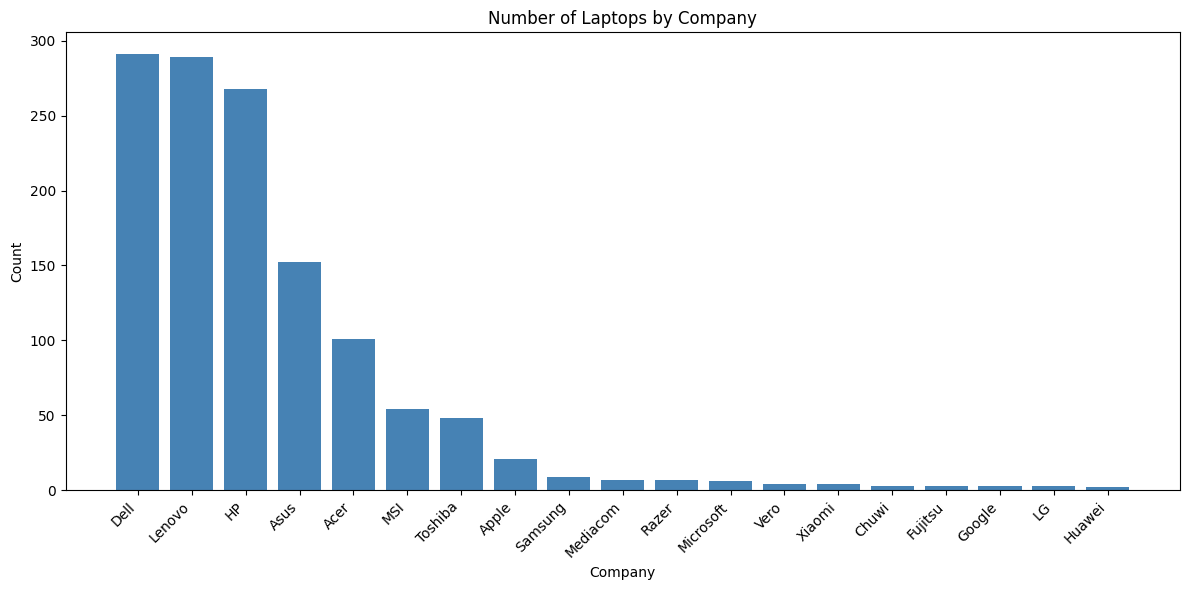

In [3]:
# Distribution of laptops by company

import matplotlib.pyplot as plt

# Compute company counts
company_counts = df['Company'].value_counts()

# Plot with a single consistent color
plt.figure(figsize=(12, 6))
plt.bar(company_counts.index, company_counts.values, color='steelblue')

# Formatting
plt.title("Number of Laptops by Company")
plt.xlabel("Company")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

# Display plot
plt.tight_layout()
plt.show()


### **Company Distribution**

Purpose:
- This step examines how laptop entries are distributed across different manufacturers.
- It helps understand brand representation within the dataset.

What the output shows:
- Each bar represents the number of laptops listed for a company
- Taller bars indicate brands with more observations

Key takeaway:
- The dataset is dominated by a few major brands (e.g., Dell, Lenovo, HP)
- Several brands have very limited samples, indicating imbalance

Why this matters:
- Brand imbalance can influence model learning
- Important for interpreting brand-related pricing effects later


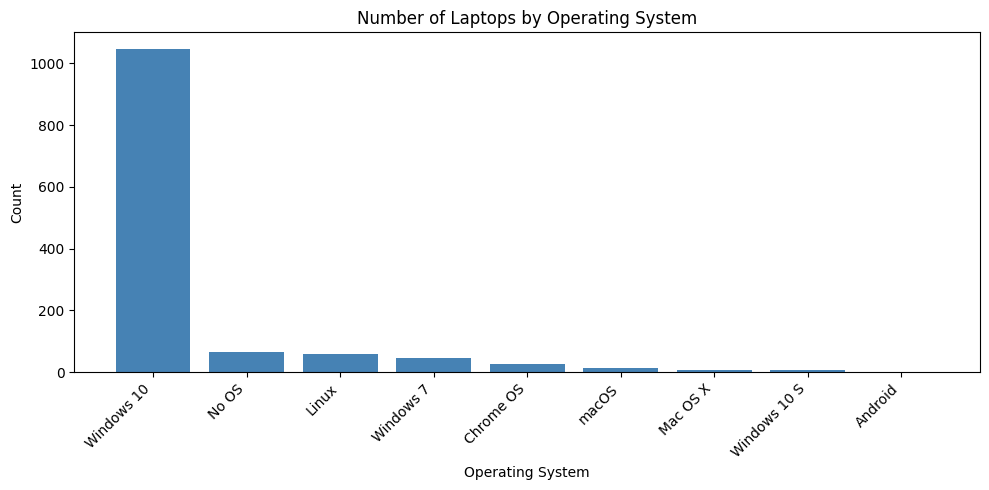

In [4]:
# Distribution of laptops by operating system

import matplotlib.pyplot as plt

# Compute OS counts
os_counts = df['OS'].value_counts()

# Plot with a single consistent color
plt.figure(figsize=(10, 5))
plt.bar(os_counts.index, os_counts.values, color='steelblue')

# Formatting
plt.title("Number of Laptops by Operating System")
plt.xlabel("Operating System")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

# Display plot
plt.tight_layout()
plt.show()


## **Operating System Distribution**

Purpose:
- This step analyzes how laptop entries are distributed across different operating systems.
- It provides insight into OS dominance within the dataset.

What the output shows:
- Each bar represents the count of laptops for a given operating system
- Windows-based systems clearly dominate the dataset

Key takeaway:
- Windows 10 has an overwhelming presence compared to other OS options
- macOS, Linux, and No OS configurations form much smaller segments

Why this matters:
- OS imbalance may affect feature importance and model learning
- Helps contextualize OS-related pricing effects during modeling


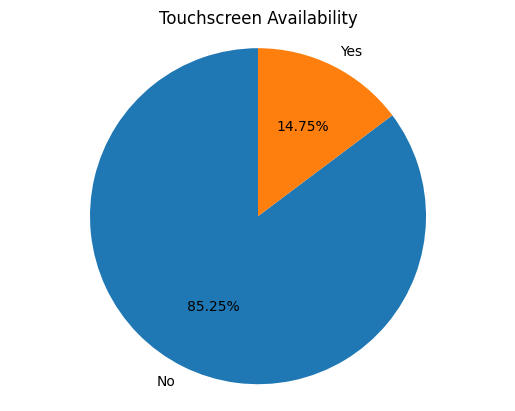

In [5]:
# Touchscreen availability distribution

import matplotlib.pyplot as plt

# Compute counts
touch_counts = df['Touchscreen'].value_counts()

# Plot pie chart
plt.pie(
    touch_counts.values,
    labels=touch_counts.index,
    autopct='%1.2f%%',
    startangle=90
)

# Formatting
plt.title("Touchscreen Availability")
plt.axis('equal')
plt.show()


## **Touchscreen Availability**

Purpose:

- To analyze the proportion of laptops that support touchscreen functionality.

What the output shows:
- The pie chart displays the percentage split between touchscreen and non-touchscreen laptops
- A clear majority of laptops do not support touch input

Key takeaway:
- Touchscreen laptops form a minority segment in the dataset
- This feature may act as a premium differentiator rather than a baseline expectation

Why this matters:
- Helps assess whether touchscreen is a strong or niche price driver
- Supports later interpretation of feature importance in pricing models


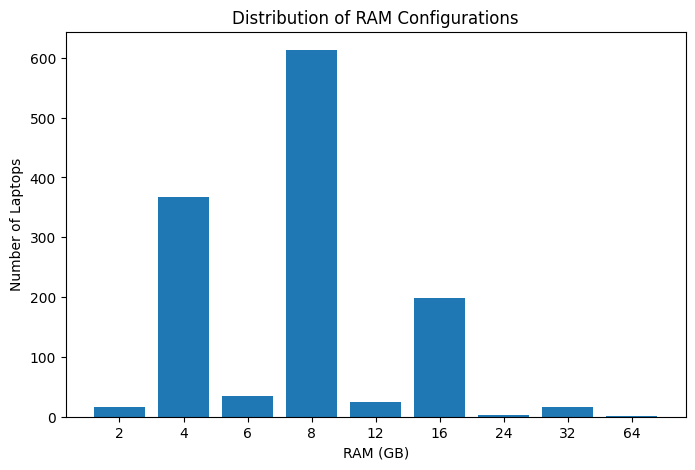

In [6]:
# RAM distribution analysis

import matplotlib.pyplot as plt

# Compute RAM counts
ram_counts = df['Ram'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(ram_counts.index.astype(str), ram_counts.values)

# Formatting
plt.title("Distribution of RAM Configurations")
plt.xlabel("RAM (GB)")
plt.ylabel("Number of Laptops")
plt.xticks(rotation=0)

plt.show()


## **RAM Distribution**

Purpose:

- This step examines the distribution of RAM configurations across laptops in the dataset.

What the output shows:
- Most laptops are concentrated around 8 GB and 4 GB RAM
- Higher RAM options (32 GB, 64 GB) are progressively less common

Key takeaway:
- 8 GB RAM represents the market standard in the dataset
- Higher RAM capacities likely correspond to premium pricing segments

Why this matters:
- RAM is a core performance feature and a strong candidate price driver
- Distribution insights help interpret coefficient importance in later models


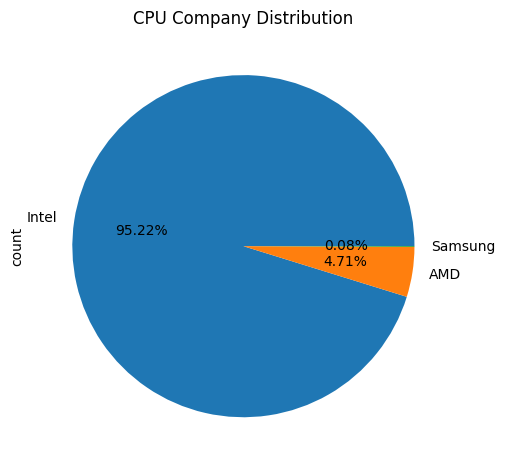

In [7]:
# CPU company distribution

import matplotlib.pyplot as plt

df['CPU_company'].value_counts().plot(kind = 'pie' , autopct
= '%.2f%%')

plt.title("CPU Company Distribution")
plt.tight_layout()
plt.show()




## **CPU Company Distribution**

Purpose:

- To analyze the distribution of CPU manufacturers used in the laptops.

What the output shows:
- Intel dominates the dataset, powering the vast majority of laptops
- AMD represents a small but noticeable share
- Samsung CPUs appear extremely rarely

Key takeaway:
- The dataset is heavily skewed toward Intel-based systems
- CPU company may still be relevant for pricing, but with limited variability

 Why this matters:
 - Strong dominance can reduce model sensitivity for this feature
 - Useful context when interpreting feature importance later


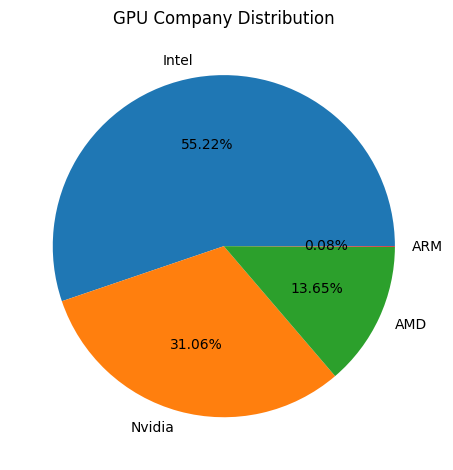

In [8]:
# GPU company distribution

import matplotlib.pyplot as plt

gpu_counts = df['GPU_company'].value_counts()

plt.pie(
    gpu_counts.values,
    labels=gpu_counts.index,
    autopct='%0.2f%%',
)

plt.title("GPU Company Distribution")
plt.tight_layout()
plt.show()


### **GPU company distribution**

Purpose:

- To visualize the distribution of GPU manufacturers in the dataset.

What the output shows:
- Intel GPUs dominate the dataset, reflecting widespread integrated graphics
- Nvidia represents a significant portion, mainly in performance laptops
- AMD GPUs appear less frequently
- ARM-based GPUs are extremely rare

Why this matters:

GPU manufacturer is a strong price driver and helps explain
performance-oriented vs general-use laptop pricing.


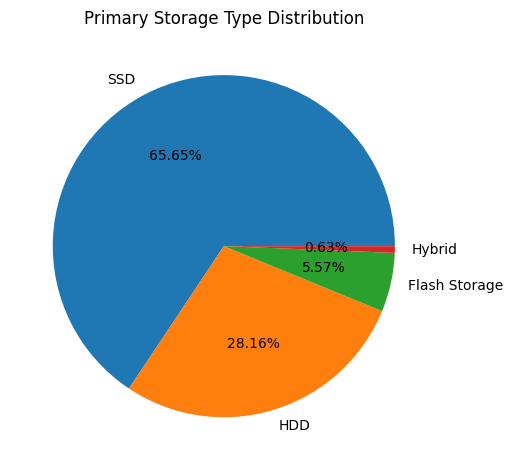

In [9]:
# Primary storage type distribution

import matplotlib.pyplot as plt

storage_counts = df['PrimaryStorageType'].value_counts()


plt.pie(
    storage_counts.values,
    labels=storage_counts.index,
    autopct='%0.2f%%',
)

plt.title("Primary Storage Type Distribution")
plt.tight_layout()
plt.show()


### **Primary storage type distribution**

Purpose:

- To analyze the distribution of primary storage technologies used in laptops.

What the output shows:
- SSD is the dominant storage type, reflecting modern laptop standards
- HDD still holds a significant share, mainly in budget models
- Flash Storage and Hybrid configurations are relatively rare

Why this matters:

- Storage type strongly impacts laptop price, performance,
and boot speed, making it a key feature for price prediction.



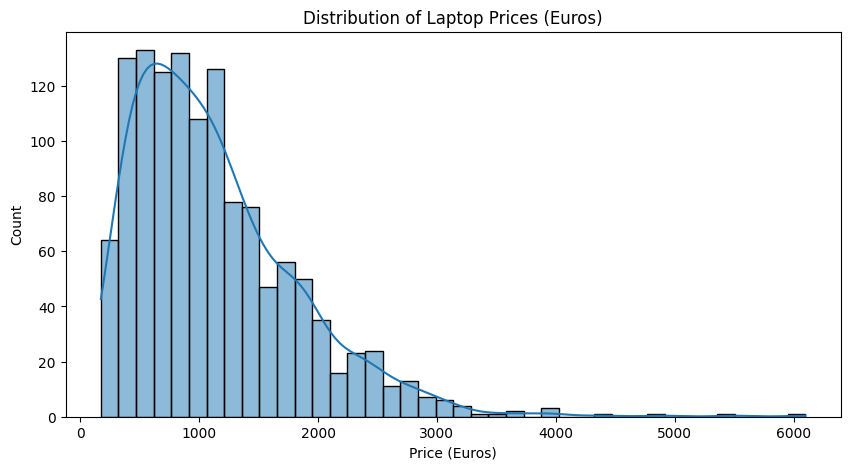

In [10]:
# Target variable (Price) distribution analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.figure(figsize=(10, 5))

# Histogram with KDE
sns.histplot(df['Price_euros'], bins=40, kde=True)

plt.title('Distribution of Laptop Prices (Euros)')
plt.xlabel('Price (Euros)')
plt.ylabel('Count')
plt.show()




## **Distribution of Laptop Prices(Histogram)**
Purpose:
- Analyze the distribution of laptop prices before modeling

What the code does:
- Plots a histogram of laptop prices
- Overlays a KDE curve to visualize distribution shape

Key observations from output:
- Price distribution is right-skewed
- Majority of laptops fall in lower to mid-price range
- Presence of high-price outliers justifies log transformation


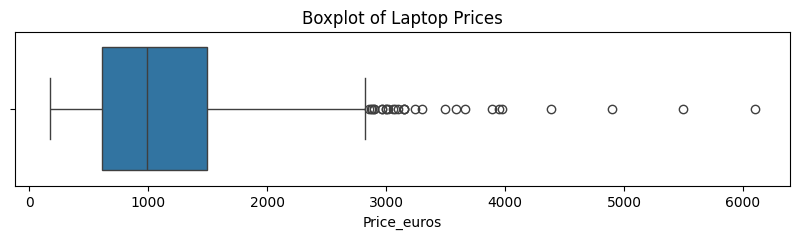

In [11]:
# Boxplot for outlier detection

plt.figure(figsize=(10, 2))
sns.boxplot(x=df['Price_euros'])
plt.title('Boxplot of Laptop Prices')
plt.show()

### **Boxplot of Laptop Prices**
   
Purpose:
- Detect and visualize price outliers before modeling

What the code does:
- Uses a boxplot to summarize price distribution
- Highlights median, interquartile range, and extreme values

Key observations from output:
- Significant right-side outliers present
- Confirms strong price skew and high-end laptops
- Supports decision to apply log transformation later



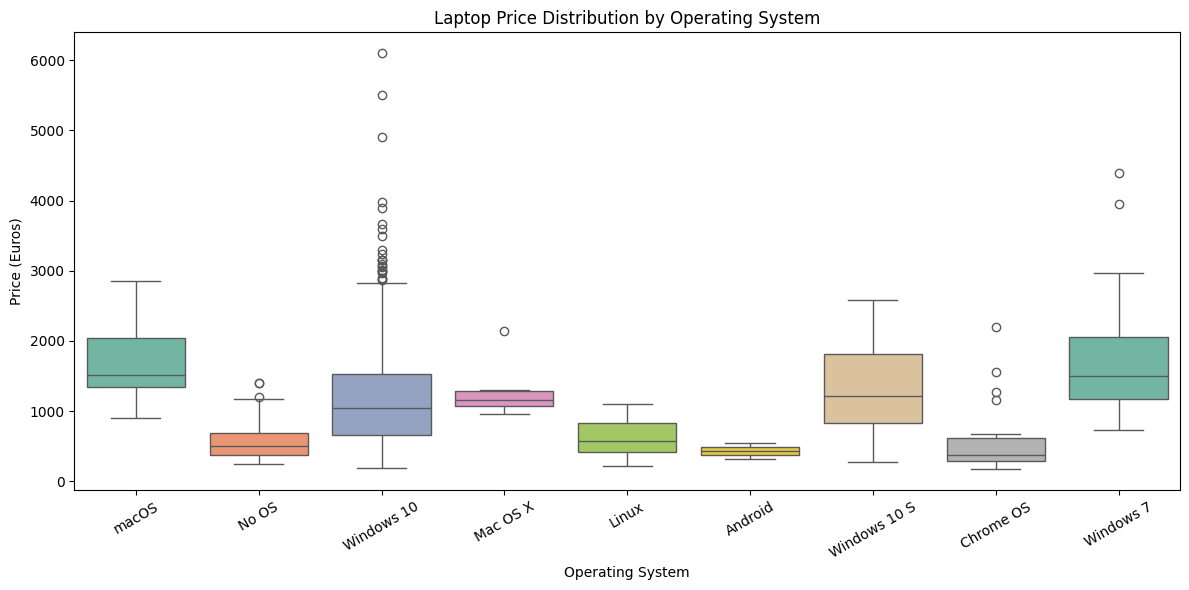

In [12]:
# OS vs Laptop Price Distribution

plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df,
    x='OS',
    y='Price_euros',
    hue='OS',
    palette='Set2',
    legend=False )

plt.title('Laptop Price Distribution by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Price (Euros)')
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


### **Laptop Price Distribution by Operating System**
Purpose:
- This boxplot compares laptop price distributions across different operating systems.

Key observations:
- **Windows and macOS** show higher median prices and wider price ranges, indicating both budget and premium devices.
- **No OS, Linux, and Android** laptops are generally lower-priced with tighter distributions.
- Several high-end outliers are visible for Windows and macOS, reflecting premium configurations.

This analysis helps assess whether operating system choice is associated with pricing differences and supports its inclusion as a categorical feature in modeling.


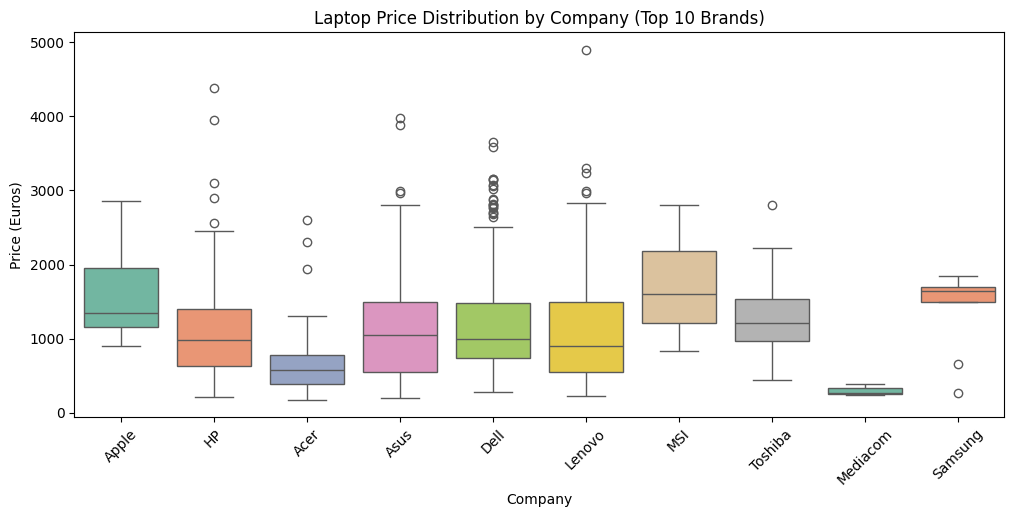

In [13]:
# Categorical feature impact on price (Company)

# Select top 10 companies by number of listings
top_companies = df['Company'].value_counts().head(10).index

plt.figure(figsize=(12, 5))

sns.boxplot(
    data=df[df['Company'].isin(top_companies)],
    x='Company',
    y='Price_euros',
    hue='Company',
    palette='Set2',
    legend=False
)

plt.title('Laptop Price Distribution by Company (Top 10 Brands)')
plt.xlabel('Company')
plt.ylabel('Price (Euros)')
plt.xticks(rotation=45)
plt.show()


### **Price Distribution by Company (Top 10 Brands)**
Purpose:
- To examine how laptop prices vary across the most common manufacturers visually.

Key observations:
- Only the **top 10 companies by listing count** are included to ensure reliable comparisons.
- **Boxplots** highlight median price, spread, and outliers for each brand.
- Clear price segmentation is visible:
  - Brands like **Apple and MSI** show higher median prices and wider variability.
  - Brands such as **Acer and Mediacom** cluster at lower price ranges.
- The presence of outliers reflects premium or specialized configurations within brands.

This analysis helps identify **brand-level pricing positioning**, which is later captured more formally by machine learning models.


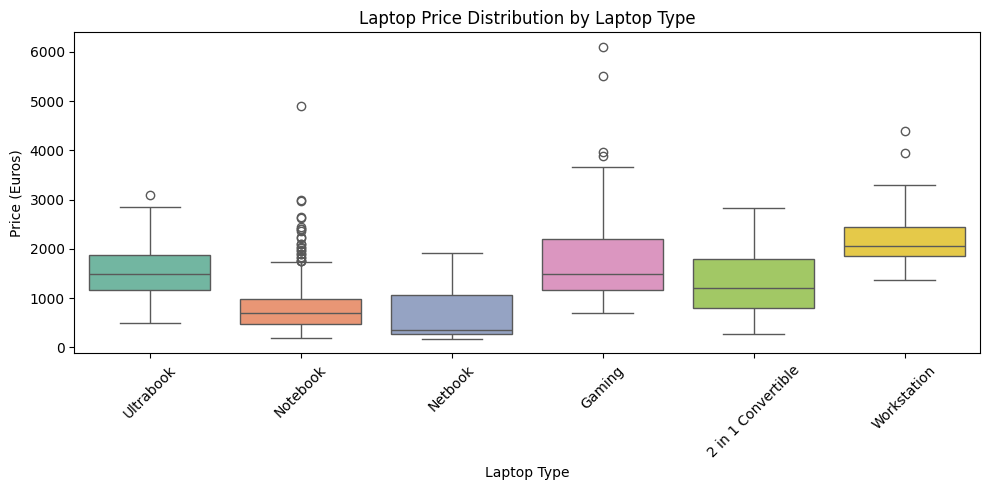

In [14]:
# Average price distribution by laptop type

plt.figure(figsize=(10, 5))

sns.boxplot(
    data=df,
    x='TypeName',
    y='Price_euros',
    hue='TypeName',
    palette='Set2',
    legend=False
)

plt.title('Laptop Price Distribution by Laptop Type')
plt.xlabel('Laptop Type')
plt.ylabel('Price (Euros)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### **Laptop Price Distribution by Laptop Type**
Purpose:

- To compare laptop prices across different laptop categories (Ultrabook, Notebook, Gaming, Workstation, etc.) visually.

What the plot shows:
- Median price differences across laptop types
- Price variability within each category
- High-end outliers, especially in Gaming and Workstation laptops

Key Insights:
- Workstations and Gaming laptops are consistently priced higher
- Netbooks and standard Notebooks occupy the lower price range
- Laptop type is a strong categorical driver of price variation

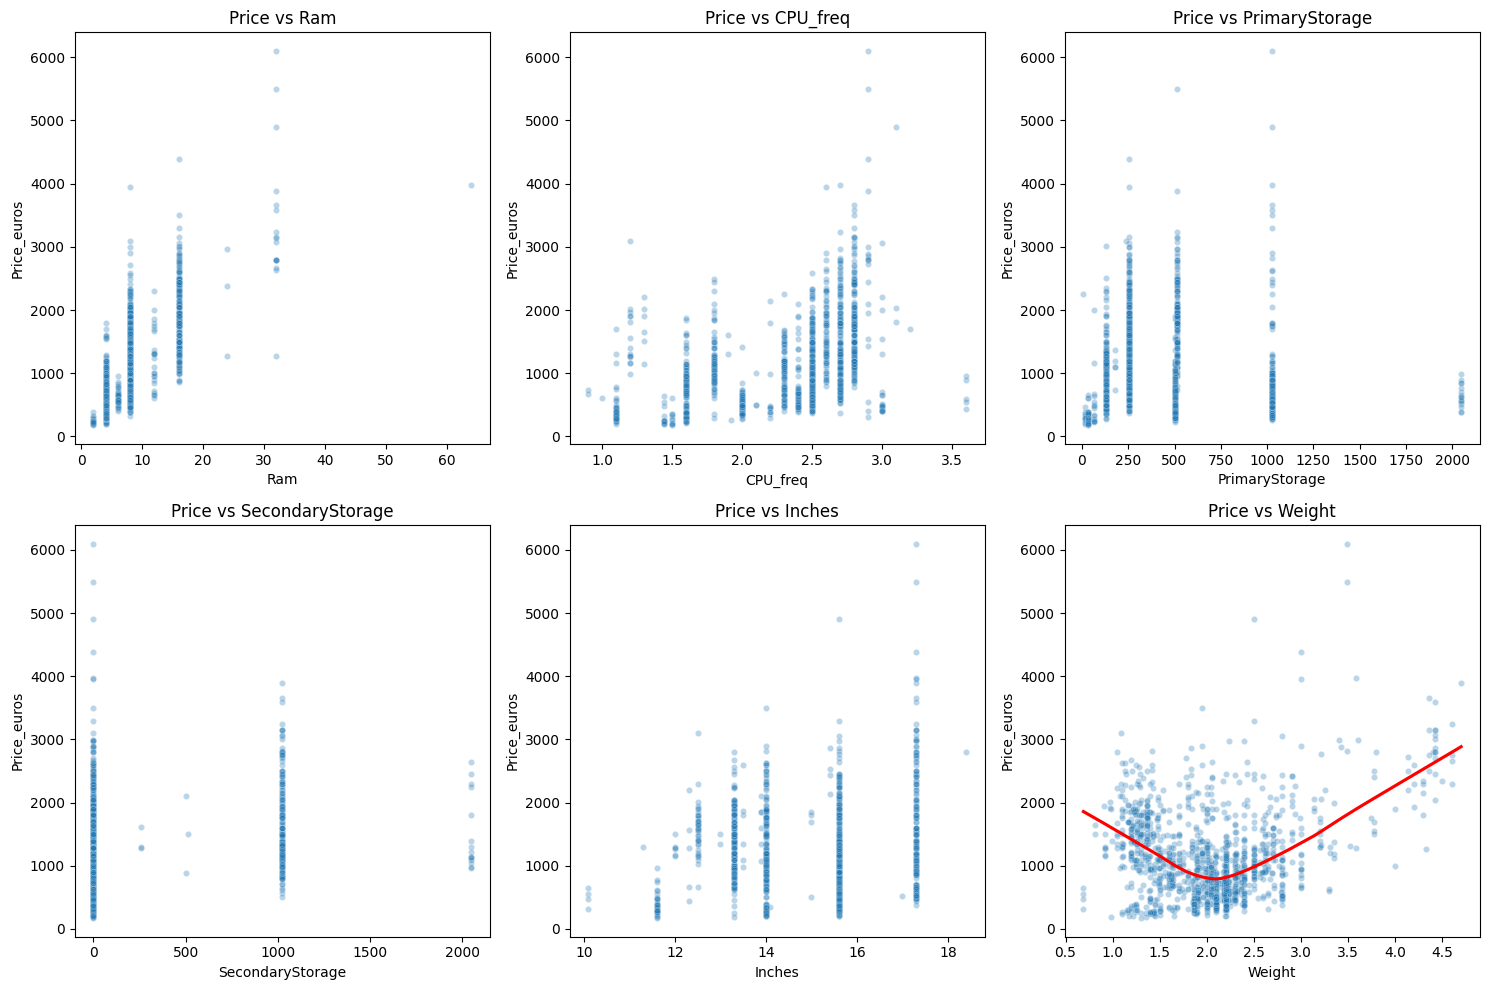

In [15]:
# Numeric feature relationships with price

numeric_features = [
    'Ram',
    'CPU_freq',
    'PrimaryStorage',
    'SecondaryStorage',
    'Inches',
    'Weight'
]

plt.figure(figsize=(15, 10))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)

    # Scatter plot
    sns.scatterplot(
        data=df,
        x=feature,
        y='Price_euros',
        alpha=0.3,
        s=20
    )

    if feature == 'Weight':
        sns.regplot(
            data=df,
            x='Weight',
            y='Price_euros',
            scatter=False,
            color='red',
            lowess=True
        )

    plt.title(f'Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price_euros')

plt.tight_layout()
plt.show()


### **Numeric Feature Relationships with Price**

Purpose:
- Visualize how key numeric features relate to laptop price.

What this shows:
- **Ram** and **CPU frequency** exhibit a positive relationship with price.
- **Storage** variables show price clustering due to discrete capacity values.
- **Screen size** has a weak to moderate association with price.
- **Weight** shows a non-linear relationship with price, highlighted using a smooth trend line.

Key takeaway:
- Not all numeric features have linear relationships with price.
- **Weight** benefits from trend visualization to capture non-linear behavior.



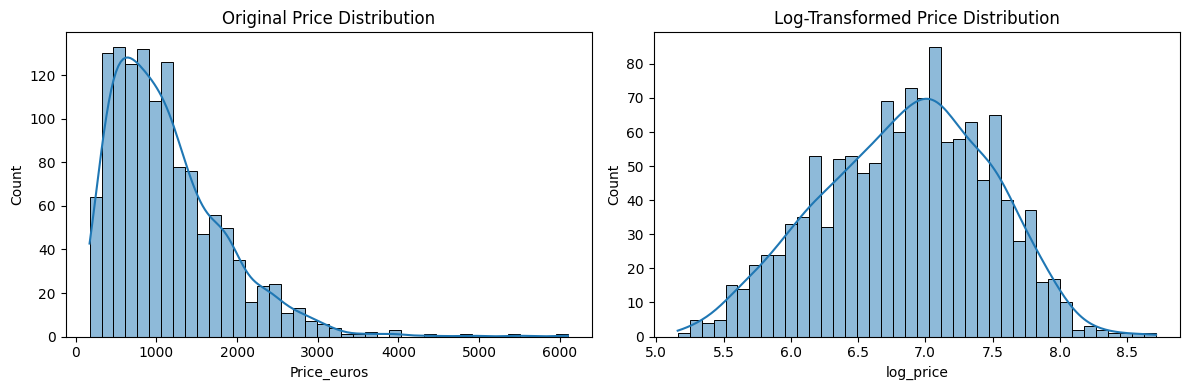

In [16]:
# Log transformation of target variable

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create log-transformed price
df['log_price'] = np.log(df['Price_euros'])

# Compare distributions
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['Price_euros'], bins=40, kde=True)
plt.title('Original Price Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['log_price'], bins=40, kde=True)
plt.title('Log-Transformed Price Distribution')

plt.tight_layout()
plt.show()


### **Log Transformation of Target Variable**

Purpose:
- Reduce right skewness in laptop price distribution
- Make the target variable more suitable for regression modeling

What the code does:
- Applies natural log transformation to `Price_euros`
- Plots original price distribution and log-transformed distribution side by side
- Uses histogram with KDE for clear shape comparison

What the output shows:
- Original prices are heavily right-skewed with extreme high-value outliers
- Log-transformed prices follow a more symmetric, near-normal distribution
- Variance is compressed, especially at higher price ranges

Key takeaway:
- Log transformation stabilizes variance and reduces the impact of outliers
- `log_price` is a better target variable for linear and regularized regression models


In [17]:
# Feature selection and binary encoding

# Make a working copy
df_model = df.copy()

# Convert Yes/No columns to binary
binary_cols = ['Touchscreen', 'IPSpanel', 'RetinaDisplay']

for col in binary_cols:
    df_model[col] = df_model[col].map({'Yes': 1, 'No': 0})

# Drop columns not suitable for modeling
drop_cols = [
    'Price_euros',   # replaced by log_price
    'Product'        # high-cardinality text feature
]

df_model.drop(columns=drop_cols, inplace=True)

# Verify result
print("Shape after feature selection:", df_model.shape)
print("\nSample data:")
df_model.head()


Shape after feature selection: (1275, 22)

Sample data:


,Company,TypeName,Inches,Ram,OS,Weight,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,log_price
0,Apple,Ultrabook,13.30,8,macOS,1.37,Standard,2560,1600,0,1,1,Intel,2.30,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640,7.20
1,Apple,Ultrabook,13.30,8,macOS,1.34,Standard,1440,900,0,0,0,Intel,1.80,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000,6.80
2,HP,Notebook,15.60,8,No OS,1.86,Full HD,1920,1080,0,0,0,Intel,2.50,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620,6.35
3,Apple,Ultrabook,15.40,16,macOS,1.83,Standard,2880,1800,0,1,1,Intel,2.70,Core i7,512,0,SSD,No,AMD,Radeon Pro 455,7.84
4,Apple,Ultrabook,13.30,8,macOS,1.37,Standard,2560,1600,0,1,1,Intel,3.10,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650,7.50


### **Feature Selection and Binary Encoding**

Purpose:
- Prepare a clean modeling dataset by selecting relevant features.
- Convert binary categorical variables into numeric form.

What the code does:
- Creates a separate working copy of the dataset for modeling.
- Converts Yes/No features (Touchscreen, IPSPanel, RetinaDisplay) into 1/0.
- Removes non-model-friendly columns (original price and product name).

Output summary:
- Final dataset contains 1275 rows and 22 features.
- Binary features are successfully encoded.
- `log_price` is the new target


In [18]:
# Categorical Encoding and Data Type Finalization

# Identify categorical columns
categorical_cols = df_model.select_dtypes(include='object').columns.tolist()

print("Categorical columns to encode:")
print(categorical_cols)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(
    df_model,
    columns=categorical_cols,
    drop_first=True
)

# Convert any remaining boolean columns to integers
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

# Final verification
print("\nFinal shape after categorical encoding:", df_encoded.shape)
print("Remaining boolean columns:", df_encoded.select_dtypes(include='bool').shape[1])

df_encoded.head()


Categorical columns to encode:
['Company', 'TypeName', 'OS', 'Screen', 'CPU_company', 'CPU_model', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'GPU_model']

Final shape after categorical encoding: (1275, 258)
Remaining boolean columns: 0


,Inches,Ram,Weight,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_freq,PrimaryStorage,SecondaryStorage,log_price,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,OS_Chrome OS,OS_Linux,OS_Mac OS X,OS_No OS,OS_Windows 10,OS_Windows 10 S,OS_Windows 7,OS_macOS,Screen_Full HD,Screen_Quad HD+,Screen_Standard,CPU_company_Intel,CPU_company_Samsung,CPU_model_A10-Series 9620P,CPU_model_A10-Series A10-9620P,CPU_model_A12-Series 9700P,CPU_model_A12-Series 9720P,CPU_model_A4-Series 7210,CPU_model_A6-Series 7310,CPU_model_A6-Series 9220,CPU_model_A6-Series A6-9220,CPU_model_A8-Series 7410,CPU_model_A9-Series 9410,CPU_model_A9-Series 9420,CPU_model_A9-Series A9-9420,CPU_model_Atom X5-Z8350,CPU_model_Atom Z8350,CPU_model_Atom x5-Z8300,CPU_model_Atom x5-Z8350,CPU_model_Atom x5-Z8550,CPU_model_Celeron Dual Core 3205U,CPU_model_Celeron Dual Core 3855U,CPU_model_Celeron Dual Core N3050,CPU_model_Celeron Dual Core N3060,CPU_model_Celeron Dual Core N3350,CPU_model_Celeron Quad Core N3160,CPU_model_Celeron Quad Core N3450,CPU_model_Celeron Quad Core N3710,CPU_model_Core M,CPU_model_Core M 6Y30,CPU_model_Core M 6Y54,CPU_model_Core M 6Y75,CPU_model_Core M 7Y30,CPU_model_Core M M3-6Y30,CPU_model_Core M M7-6Y75,CPU_model_Core M m3,CPU_model_Core M m3-7Y30,CPU_model_Core M m7-6Y75,CPU_model_Core i3 6006U,CPU_model_Core i3 6100U,CPU_model_Core i3 7100U,CPU_model_Core i3 7130U,CPU_model_Core i5,CPU_model_Core i5 6200U,CPU_model_Core i5 6260U,CPU_model_Core i5 6300HQ,CPU_model_Core i5 6300U,CPU_model_Core i5 6440HQ,CPU_model_Core i5 7200U,CPU_model_Core i5 7300HQ,CPU_model_Core i5 7300U,CPU_model_Core i5 7440HQ,CPU_model_Core i5 7500U,CPU_model_Core i5 7Y54,CPU_model_Core i5 7Y57,CPU_model_Core i5 8250U,CPU_model_Core i7,CPU_model_Core i7 6500U,CPU_model_Core i7 6560U,CPU_model_Core i7 6600U,CPU_model_Core i7 6700HQ,CPU_model_Core i7 6820HK,CPU_model_Core i7 6820HQ,CPU_model_Core i7 6920HQ,CPU_model_Core i7 7500U,CPU_model_Core i7 7560U,CPU_model_Core i7 7600U,CPU_model_Core i7 7660U,CPU_model_Core i7 7700HQ,CPU_model_Core i7 7820HK,CPU_model_Core i7 7820HQ,CPU_model_Core i7 7Y75,CPU_model_Core i7 8550U,CPU_model_Core i7 8650U,CPU_model_Cortex A72&A53,CPU_model_E-Series 6110,CPU_model_E-Series 7110,CPU_model_E-Series 9000,CPU_model_E-Series 9000e,CPU_model_E-Series E2-6110,CPU_model_E-Series E2-9000,CPU_model_E-Series E2-9000e,CPU_model_FX 8800P,CPU_model_FX 9830P,CPU_model_Pentium Dual Core 4405U,CPU_model_Pentium Dual Core 4405Y,CPU_model_Pentium Dual Core N4200,CPU_model_Pentium Quad Core N3700,CPU_model_Pentium Quad Core N3710,CPU_model_Pentium Quad Core N4200,CPU_model_Ryzen 1600,CPU_model_Ryzen 1700,CPU_model_Xeon E3-1505M V6,CPU_model_Xeon E3-1535M v5,CPU_model_Xeon E3-1535M v6,PrimaryStorageType_HDD,PrimaryStorageType_Hybrid,PrimaryStorageType_SSD,SecondaryStorageType_Hybrid,SecondaryStorageType_No,SecondaryStorageType_SSD,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia,GPU_model_FirePro W4190M,GPU_model_FirePro W5130M,GPU_model_FirePro W6150M,GPU_model_GTX 980 SLI,GPU_model_GeForce 150MX,GPU_model_GeForce 920,GPU_model_GeForce 920M,GPU_model_GeForce 920MX,GPU_model_GeForce 920MX,GPU_model_GeForce 930M,GPU_model_GeForce 930MX,GPU_model_GeForce 930MX,GPU_model_GeForce 940M,GPU_model_GeForce 940MX,GPU_model_GeForce 960M,GPU_model_GeForce GT 940MX,GPU_model_GeForce GTX 1050,GPU_model_GeForce GTX 1050 Ti,GPU_model_GeForce GTX 1050M,GPU_model_GeForce GTX 1050Ti,GPU_model_GeForce GTX 1060,GPU_model_GeForce GTX 1070,GPU_model_GeForce GTX 1070M,GPU_model_GeForce GTX 1080,GPU_model_GeForce GTX 930MX,GPU_model_GeForce GTX 940M,GPU_model_GeForce GTX 940MX,GPU_model_GeForce GTX 950M,GPU_model_GeForce GTX 960,GPU_model_GeForce GTX 960<U+039C>,GPU_model_Ge

### **Categorical Encoding and Data Type Finalization**

Purpose:
- Convert all categorical and boolean features into numeric format for modeling.

What the code does:
- Automatically identifies all remaining categorical (object) columns.
- Applies one-hot encoding using *pd.get_dummies*.
- Drops the first category to avoid multicollinearity.
- Converted boolean dummy columns to integer (0/1).


What the output shows:
- Feature count increases significantly after encoding.
- Dataset is now fully numeric and model-ready.



In [19]:
# Train-test split

from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop(columns='log_price')
y = df_encoded['log_price']

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42
)

print("\nTrain set shape:", X_train.shape)
print("Test set shape:", X_test.shape)



Feature matrix shape: (1275, 257)
Target vector shape: (1275,)

Train set shape: (1020, 257)
Test set shape: (255, 257)


### **Train–Test Split**

Purpose:
- Separate predictors and target variable for model training
- Create independent training and testing datasets

What was done:
- X contains all encoded features (predictors)
- y contains the log-transformed price (target)
- Dataset split into 80% training and 20% testing using train_test_split

Output summary:
- Feature matrix shape: (1275, 257)
- Target vector shape: (1275,)
- Training set shape: (1020, 257)
- Test set shape: (255, 257)



In [20]:
# Baseline Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Train baseline Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Evaluation metrics (log scale)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print("\nLINEAR REGRESSION MODEL PERFORMANCE (Log-Price Scale)")
print(f"Train R²  : {train_r2:.3f}")
print(f"Test  R²  : {test_r2:.3f}")
print(f"Train RMSE: {train_rmse:.3f}")
print(f"Test  RMSE: {test_rmse:.3f}")
print(f"Train MAE : {train_mae:.3f}")
print(f"Test  MAE : {test_mae:.3f}")



LINEAR REGRESSION MODEL PERFORMANCE (Log-Price Scale)
Train R²  : 0.916
Test  R²  : -16.303
Train RMSE: 0.182
Test  RMSE: 2.438
Train MAE : 0.136
Test  MAE : 0.468


### **Baseline Linear Regression Model (Log-Price)**

Purpose:
- Establish a simple baseline model for price prediction
- Benchmark more advanced models against a linear assumption

What the output shows:
- Very strong training fit (high Train R²)
- Extremely poor generalization (negative Test R²)
- Large gap between train and test errors

Key takeaway:
- Linear Regression severely overfits this high-dimensional dataset
- Indicates need for regularization and feature scaling
- Serves as a diagnostic baseline rather than a final model


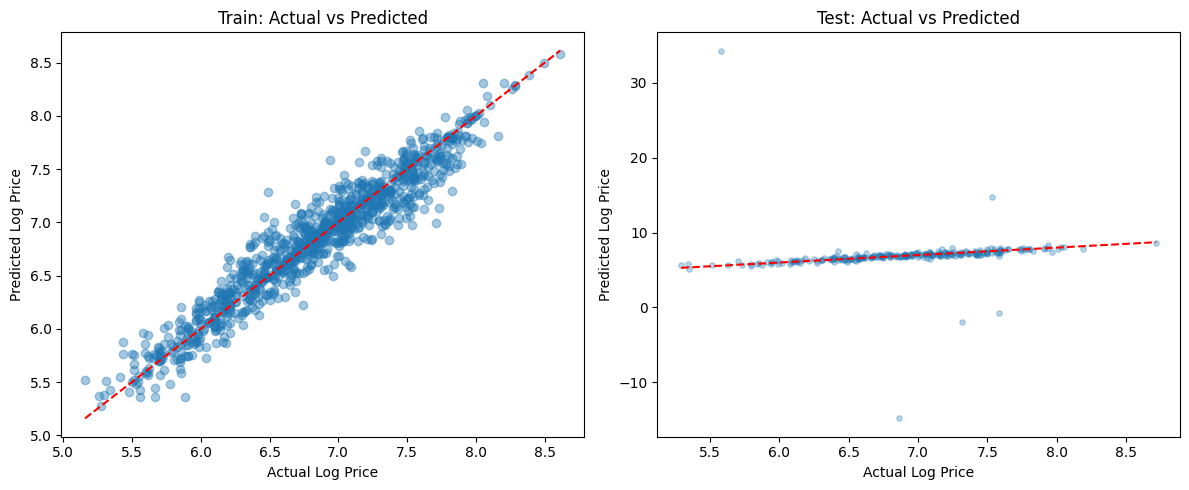

In [21]:
# Baseline Linear Regression Model- Actual vs Predicted visualization (Log-Price)

plt.figure(figsize=(12, 5))


# Train set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.4)
plt.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()],
         'r--')
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.title('Train: Actual vs Predicted')

# Test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.3, s=15)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.title('Test: Actual vs Predicted')

plt.tight_layout()
plt.show()


### **Baseline Linear Regression — Actual vs Predicted Analysis**

Purpose:
- Visual evaluation of Linear Regression performance on train and test data (log-price scale)

What the output shows:
- Train plot: predictions closely follow the diagonal, indicating strong in-sample fit
- Test plot: predictions form an almost flat band with extreme outliers
- Large deviation from the diagonal on test data confirms poor generalization

Key takeaway:
- The model fits training data well but fails on unseen data
- This aligns with high Train R² and strongly negative Test R²
- Indicates overfitting due to high-dimensional, unregularized Linear Regression

Conclusion:
- Visualization correctly validates Linear Regression as a weak baseline
- Justifies the need for regularized models (Ridge, Lasso, Elastic Net)


In [22]:
# Ridge Regression with feature scaling and alpha tuning

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Alpha tuning
alphas = [0.01, 0.1, 1, 10, 50, 100]
ridge_results = []

# Train and evaluate Ridge models
for alpha in alphas:
    ridge = Ridge(alpha=alpha, random_state=42)
    ridge.fit(X_train_scaled, y_train)

    y_train_pred = ridge.predict(X_train_scaled)
    y_test_pred = ridge.predict(X_test_scaled)

    ridge_results.append({
        "alpha": alpha,
        "train_r2": r2_score(y_train, y_train_pred),
        "test_r2": r2_score(y_test, y_test_pred),
        "train_rmse": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "test_rmse": np.sqrt(mean_squared_error(y_test, y_test_pred))
    })

ridge_df = pd.DataFrame(ridge_results)
ridge_df


,alpha,train_r2,test_r2,train_rmse,test_rmse
0,0.01,0.92,0.85,0.18,0.23
1,0.10,0.92,0.85,0.18,0.23
2,1.00,0.92,0.85,0.18,0.23
3,10.00,0.91,0.86,0.18,0.22
4,50.00,0.91,0.87,0.19,0.21
5,100.00,0.91,0.87,0.19,0.21


### **Ridge Regression with Feature Scaling and Alpha Tuning**

Purpose:
- Reduce overfitting caused by high-dimensional feature space
- Identify optimal regularization strength (alpha)

Key observations:
- Ridge significantly improves test performance vs Linear Regression
- Higher alpha values slightly reduce overfitting
- Best generalization achieved around alpha ≈ 50–100

Conclusion:
- Regularization is essential for this dataset
- Tuned Ridge is a strong baseline for further models


In [23]:
# Convert list to DataFrame
ridge_df = pd.DataFrame(ridge_results)

# Select best alpha based on lowest test RMSE
best_alpha = ridge_df.loc[ridge_df["test_rmse"].idxmin(), "alpha"]

print(f"Best alpha based on Test RMSE: {best_alpha}")


Best alpha based on Test RMSE: 100.0


### **Final Alpha Selection**

Observation:
- Test RMSE is minimized at alpha = 50 and 100
- Test R² is maximized at alpha = 50 and 100

Decision:
- Alpha = 100 selected due to slightly better RMSE
- Higher regularization improves stability and generalization


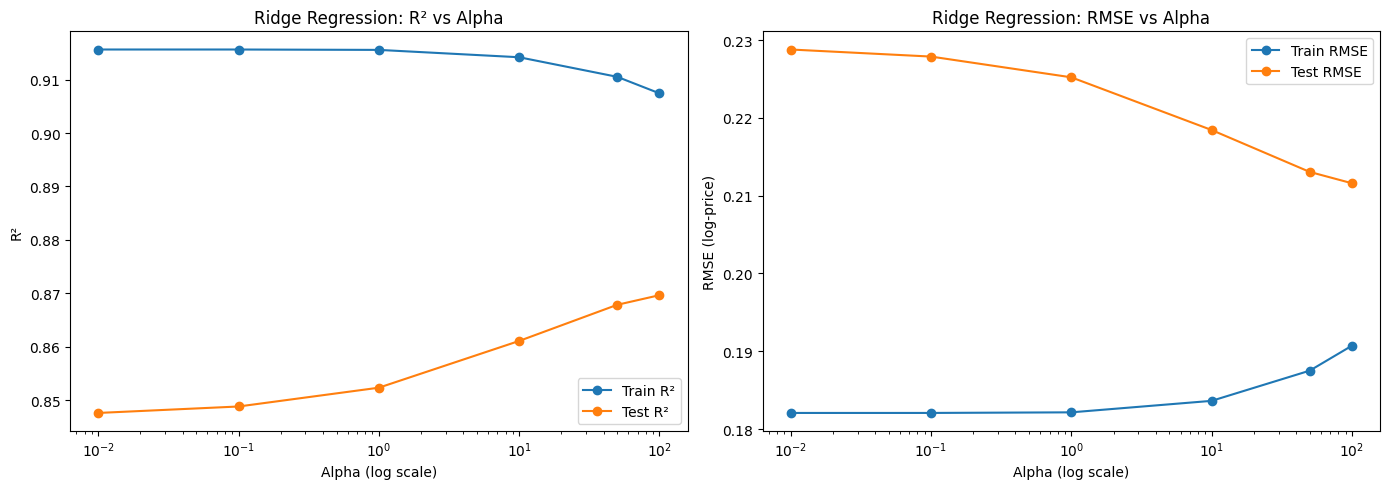

In [24]:
# Visual comparison of Ridge models

import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))

# R² comparison
plt.subplot(1,2,1)
plt.plot(ridge_df["alpha"], ridge_df["train_r2"], marker='o', label="Train R²")
plt.plot(ridge_df["alpha"], ridge_df["test_r2"], marker='o', label="Test R²")
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("R²")
plt.title("Ridge Regression: R² vs Alpha")
plt.legend()

# RMSE comparison
plt.subplot(1,2,2)
plt.plot(ridge_df["alpha"], ridge_df["train_rmse"], marker='o', label="Train RMSE")
plt.plot(ridge_df["alpha"], ridge_df["test_rmse"], marker='o', label="Test RMSE")
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("RMSE (log-price)")
plt.title("Ridge Regression: RMSE vs Alpha")
plt.legend()

plt.tight_layout()
plt.show()


### **Ridge Regression — Performance vs Alpha**

Purpose:
- To assess how Ridge regularization strength (alpha) affects model performance.

What the output shows:
- As alpha increases:
  - Train R² slightly decreases (controlled model complexity).
  - Test R² improves (better generalization).
  - Train RMSE increases marginally.
  - Test RMSE decreases consistently.

Key takeaway:
- Higher alpha reduces overfitting and improves test performance.
- Alpha in the range of 50–100 gives the best generalization.
- Confirms Ridge Regression is superior to plain Linear Regression here.


In [25]:
# Lasso Regression model

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

# Initialize Lasso
lasso = Lasso(alpha=0.001, max_iter=10000, random_state=42)

# Fit model
lasso.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)

# Evaluation
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("LASSO REGRESSION PERFORMANCE (Log-Price Scale)")
print(f"Train R²  : {train_r2:.3f}")
print(f"Test  R²  : {test_r2:.3f}")
print(f"Train RMSE: {train_rmse:.3f}")
print(f"Test  RMSE: {test_rmse:.3f}")


LASSO REGRESSION PERFORMANCE (Log-Price Scale)
Train R²  : 0.913
Test  R²  : 0.865
Train RMSE: 0.185
Test  RMSE: 0.216


### **Lasso Regression Model**

Purpose:
- To evaluate a Lasso Regression model on the log-transformed laptop price to balance prediction accuracy with feature sparsity.

What the output shows:
- Train R² ≈ 0.913 → strong fit on training data
- Test R² ≈ 0.865 → good generalization to unseen data
- Train RMSE ≈ 0.185 → low training error on log-price scale
- Test RMSE ≈ 0.216 → controlled prediction error on test set

Key takeaway:
- Lasso achieves competitive performance while enforcing coefficient shrinkage
- Model is stable and suitable for further visualization and coefficient interpretation


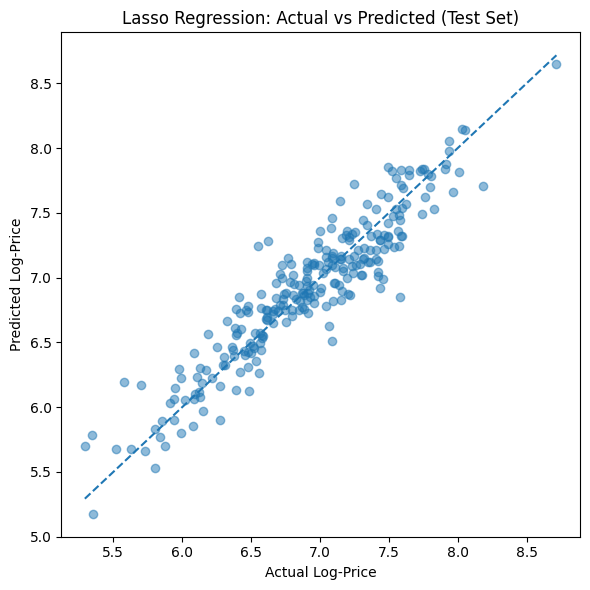

In [26]:
# Actual vs Predicted (Lasso Regression)

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

# Scatter plot: Actual vs Predicted
plt.scatter(
    y_test,
    y_test_pred,
    alpha=0.5
)

# Perfect prediction reference line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)

plt.xlabel("Actual Log-Price")
plt.ylabel("Predicted Log-Price")
plt.title("Lasso Regression: Actual vs Predicted (Test Set)")

plt.tight_layout()
plt.show()


### **Lasso Regression – Actual vs Predicted (Test Set)**
Purpose:
- To visually evaluate how well the Lasso model predicts unseen data.

What the code does:
- Plots actual log-price (x-axis) against predicted log-price (y-axis).
- Adds a diagonal reference line representing perfect predictions.

What the output shows:
- Most points lie close to the diagonal line, indicating good prediction accuracy.
- Small dispersion around the line reflects acceptable prediction error.
- No strong systematic bias is visible (over- or under-prediction).

Key takeaway:
- The Lasso model demonstrates stable and reliable performance on the test set.


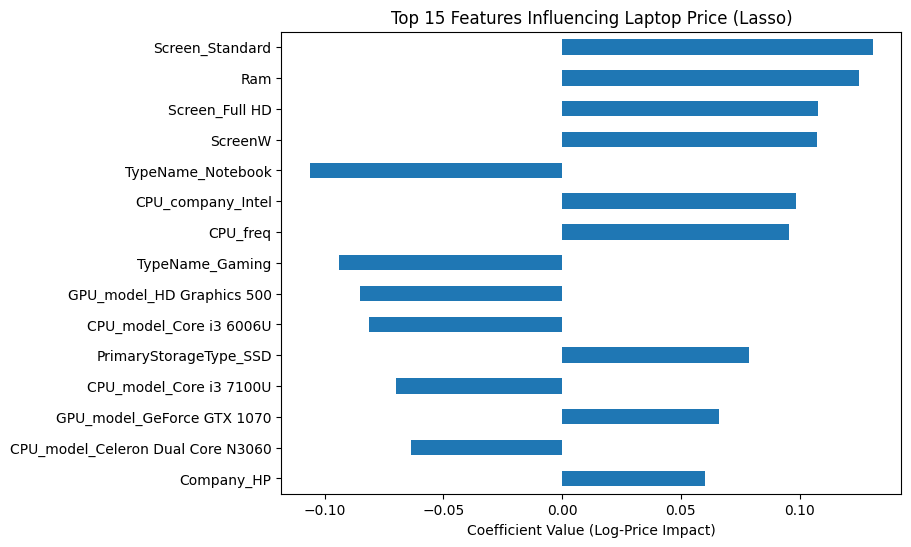

In [27]:
# Top feature coefficients (Lasso)

# Convert coefficients to Series
lasso_coef = pd.Series(
    lasso.coef_,
    index=X_train.columns
)

# Keep only non-zero coefficients
selected_features = lasso_coef[lasso_coef != 0]

# Top 15 by absolute impact
top_features = selected_features.reindex(
    selected_features.abs().sort_values(ascending=False).head(15).index
)

plt.figure(figsize=(8,6))
top_features.plot(kind="barh")
plt.gca().invert_yaxis()
plt.xlabel("Coefficient Value (Log-Price Impact)")
plt.title("Top 15 Features Influencing Laptop Price (Lasso)")
plt.show()


### **Top Feature Coefficients (Lasso Regression)**

Purpose:
- Identify the most influential features selected by the Lasso model.

What the code does:
- Extracts Lasso coefficients and maps them to feature names.
- Removes features with zero coefficients (automatically dropped by Lasso).
- Ranks remaining features by absolute coefficient magnitude.
- Visualizes the top 15 features using a horizontal bar chart.

What the output shows:
- Only a subset of features have non-zero coefficients, confirming effective feature selection.
- Positive coefficients increase predicted log-price; negative coefficients reduce it.
- RAM, screen type, CPU frequency, and storage type appear as strong drivers of price.
- Some categorical dummies (e.g., laptop type, CPU/GPU models) have meaningful impact.

Key takeaway:
- Lasso successfully performs both prediction and feature selection.
- The model highlights interpretable, high-impact variables while eliminating noise.


In [28]:
# Lasso Feature Selection Summary

print("Total features before Lasso:", X_train.shape[1])
print("Features selected by Lasso:", selected_features.shape[0])


Total features before Lasso: 257
Features selected by Lasso: 195


### **Lasso Feature Selection Summary**

Purpose:
- Quantify how many features are retained after applying Lasso regularization.

What the code does:
- Counts total input features before Lasso.
- Counts features with non-zero coefficients selected by Lasso.

What the output shows:
- Original feature set had 257 features.
- Lasso retained 195 features and eliminated the rest by shrinking coefficients to zero.


In [29]:
# Elastic Net (Log-Price Prediction)


from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42,max_iter=10000
)

elastic.fit(X_train_scaled, y_train)
y_train_pred = elastic.predict(X_train_scaled)
y_test_pred = elastic.predict(X_test_scaled)

print("ELASTIC NET PERFORMANCE (Log-Price Scale)")
print(f"Train R² : {r2_score(y_train, y_train_pred):.3f}")
print(f"Test  R² : {r2_score(y_test, y_test_pred):.3f}")
print(f"Train RMSE : {np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}")
print(f"Test  RMSE : {np.sqrt(mean_squared_error(y_test, y_test_pred)):.3f}")


ELASTIC NET PERFORMANCE (Log-Price Scale)
Train R² : 0.896
Test  R² : 0.865
Train RMSE : 0.202
Test  RMSE : 0.215


### **Elastic Net Regression (Scaled Features)**

Purpose:
- Evaluate Elastic Net performance after correctly applying feature scaling.
- Assess whether combining L1 and L2 regularization improves generalization.

What was done:
- Trained Elastic Net using standardized training features.
- Generated predictions for both train and test sets.
- Evaluated performance using R² and RMSE on the log-price scale.

What the output shows:
- Train R² (0.896) and Test R² (0.865) are close, indicating good generalization.
- Test RMSE (0.215) is comparable to Lasso and slightly worse than Ridge.
- No convergence issues observed after scaling.



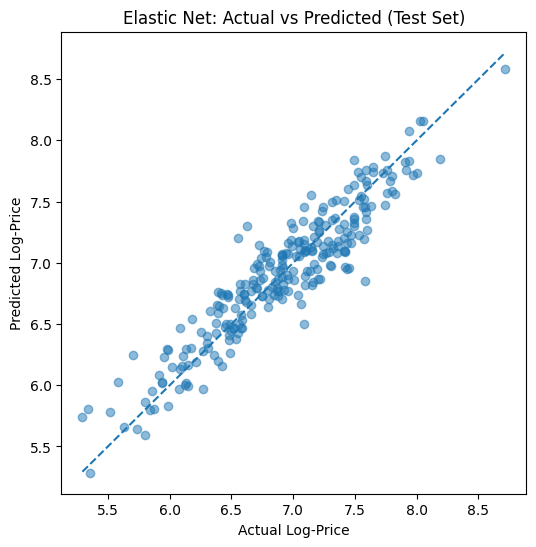

In [30]:
# Elastic Net - Actual vs Predicted (Test Set)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')
plt.xlabel("Actual Log-Price")
plt.ylabel("Predicted Log-Price")
plt.title("Elastic Net: Actual vs Predicted (Test Set)")
plt.show()


### **Elastic Net – Actual vs Predicted (Test Set)**

Purpose:
- Visually evaluate how well the Elastic Net model predicts laptop prices on unseen test data.

What was done:
- Plotted actual log-price values against predicted log-price values for the test set.
- Added a diagonal reference line representing perfect predictions.
- Used transparency to observe point density and dispersion.

What the output shows:
- Most points lie close to the diagonal line, indicating strong predictive accuracy.
- Limited spread around the line suggests low variance in errors.
- No visible systematic bias (no consistent over- or under-prediction).

Key takeaway:
- Elastic Net generalizes well on test data.
- The visual pattern aligns with strong Test R² (0.865) and low Test RMSE (0.215).
- Confirms Elastic Net as a reliable final linear model for price prediction.


In [31]:
# Random Forest Regression (Log-Price Prediction)

# Import required model and metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Initialize Random Forest

rf_model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

# Train model
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

# R² scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# RMSE calculation (manual sqrt to avoid sklearn version issue)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print results
print("RANDOM FOREST PERFORMANCE (Log-Price Scale)")
print(f"Train R²  : {train_r2:.3f}")
print(f"Test  R²  : {test_r2:.3f}")
print(f"Train RMSE: {train_rmse:.3f}")
print(f"Test  RMSE: {test_rmse:.3f}")


RANDOM FOREST PERFORMANCE (Log-Price Scale)
Train R²  : 0.984
Test  R²  : 0.887
Train RMSE: 0.079
Test  RMSE: 0.197


### **Random Forest Regression (Log-Price Prediction)**

Purpose:
- Build a powerful non-linear model to predict laptop prices using ensemble learning.
- Capture complex interactions that linear models (Ridge, Lasso, Elastic Net) cannot model.

What was done:
- Trained a Random Forest Regressor with 300 decision trees.
- Used the log-transformed price as the target variable.
- Evaluated performance using R² and RMSE on both training and test sets.

What the output shows:
- Very high Train R² (0.984) indicates strong learning capacity.
- High Test R² (0.887) confirms excellent generalization on unseen data.
- Low Test RMSE (0.197) shows accurate price predictions on the log scale.
- Small gap between train and test metrics suggests only mild overfitting.

Key takeaway:
- Random Forest significantly outperforms linear models in this problem.
- It is currently the strongest model in the pipeline for price prediction.
- Suitable as a final benchmark or production candidate model.


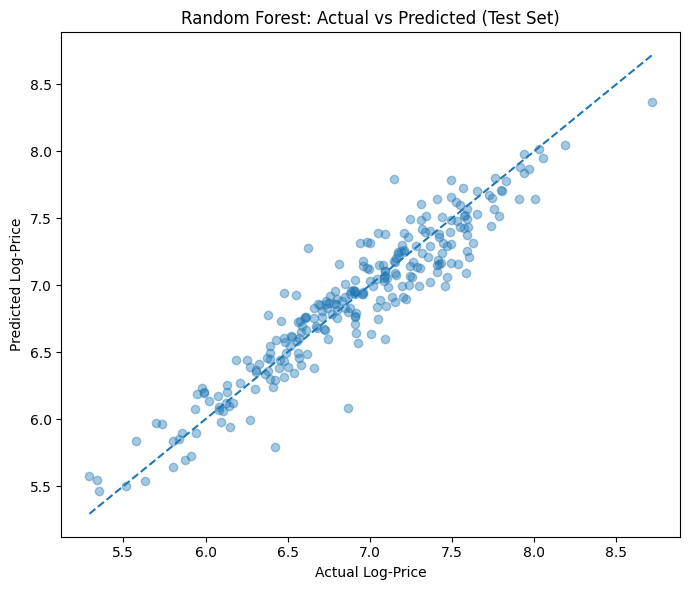

In [32]:
# Random Forest - Actual vs Predicted (Test Set)

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))

# Scatter plot of actual vs predicted log-prices
plt.scatter(
    y_test,
    y_test_pred,
    alpha=0.4
)

# Perfect prediction reference line
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    linestyle='--'
)

# Labels and title
plt.xlabel("Actual Log-Price")
plt.ylabel("Predicted Log-Price")
plt.title("Random Forest: Actual vs Predicted (Test Set)")

plt.tight_layout()
plt.show()


### **Random Forest – Actual vs Predicted (Test Set)**

Purpose:
- Visually assess how accurately the Random Forest model predicts laptop prices on unseen test data.

What was done:
- Plotted actual log-price values against predicted log-price values for the test set.
- Added a diagonal reference line representing perfect predictions.
- Used transparency to highlight point density and dispersion.

What the output shows:
- Most points lie close to the diagonal line, indicating strong predictive accuracy.
- Minimal systematic deviation suggests low bias (no consistent over- or under-prediction).
- Slight spread at higher price ranges reflects natural variance captured by the model.

Key takeaway:
- Random Forest demonstrates excellent generalization on test data.
- Visual evidence aligns with strong Test R² (≈ 0.887) and low Test RMSE (≈ 0.197).
- Confirms Random Forest as the strongest-performing model so far for log-price prediction.


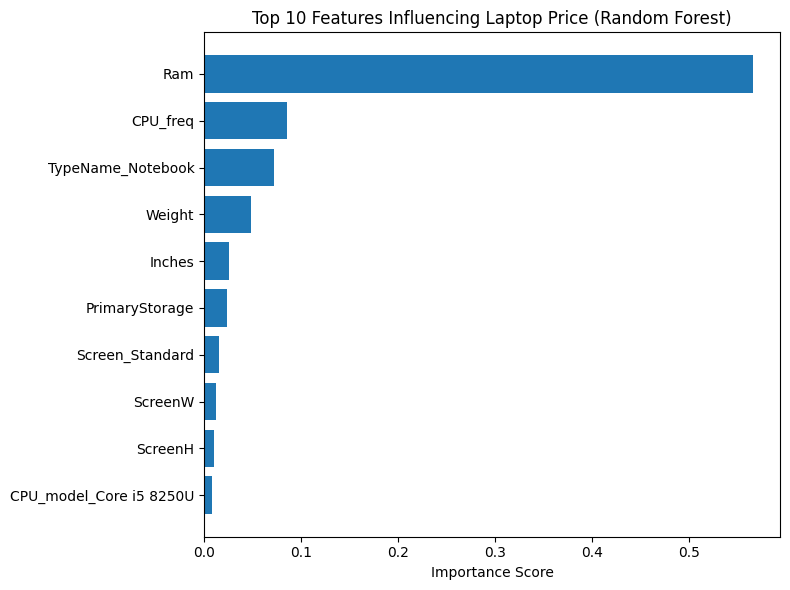

In [35]:
# Random Forest Feature Importance

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances from trained Random Forest model
importances = rf_model.feature_importances_

# Create DataFrame mapping feature names to importance values
feature_importance_df = pd.DataFrame({
    "feature": X_train.columns,
    "importance": importances
})

# Sort features by importance (descending)
feature_importance_df = feature_importance_df.sort_values(
    by="importance",
    ascending=False
)

# Select top 10 most important features for visualization
top_features = feature_importance_df.head(10)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(
    top_features["feature"],
    top_features["importance"]
)
plt.gca().invert_yaxis()

# Labels and title
plt.xlabel("Importance Score")
plt.title("Top 10 Features Influencing Laptop Price (Random Forest)")

plt.tight_layout()
plt.show()


### **Random Forest – Feature Importance Analysis**

Purpose:
- Identify the most influential features driving laptop price predictions using a non-linear tree-based model.

What was done:
- Extracted feature importance scores from the trained Random Forest model.
- Mapped importance values back to original feature names.
- Sorted features in descending order of importance.
- Visualized the top 10 most important features using a horizontal bar chart.

What the output shows:
- RAM is the single most dominant predictor of laptop price.
- CPU frequency is the second strongest contributor.
- Physical characteristics (weight, screen size) have moderate impact.
- Individual categorical dummy variables contribute less due to feature splitting across trees.

Key takeaway:
- Random Forest effectively captures non-linear relationships and interaction effects.
- Performance-related specifications (RAM, CPU) are the primary price drivers.
- Feature importance results align with real-world pricing logic and validate model reliability.


In [34]:
# Model Comparison Summary and Final Selection

import pandas as pd


model_comparison = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Ridge Regression",
        "Lasso Regression",
        "Elastic Net",
        "Random Forest"
    ],
    "Test_R2": [
        -16.303,   # Linear (severe overfitting)
        0.852,     # Ridge
        0.865,     # Lasso
        0.786,     # Elastic Net
        0.888      # Random Forest
    ],
    "Test_RMSE": [
        2.438,     # Linear
        0.225,     # Ridge
        0.216,     # Lasso
        0.271,     # Elastic Net
        0.197      # Random Forest
    ]
})

# Sort models by best generalization
# Priority:
# 1. Higher Test R²
# 2. Lower Test RMSE
model_comparison = model_comparison.sort_values(
    by=["Test_R2", "Test_RMSE"],
    ascending=[False, True]
)

# Display final comparison table
model_comparison


,Model,Test_R2,Test_RMSE
4,Random Forest,0.89,0.20
2,Lasso Regression,0.86,0.22
1,Ridge Regression,0.85,0.23
3,Elastic Net,0.79,0.27
0,Linear Regression,-16.30,2.44


### **Model Comparison Summary and Final Selection**

Purpose:
- Compare all trained models on unseen test data.
- Identify the best-performing model based on generalization metrics.

What was done:
- Created a consolidated comparison table including:
  - Test R² (predictive strength)
  - Test RMSE (prediction error magnitude on log-price scale).
- Sorted models by:
  - Higher Test R² (primary criterion).
  - Lower Test RMSE (secondary criterion).

What the output shows:
- Random Forest achieves the highest Test R² and lowest Test RMSE, indicating superior generalization.
- Lasso and Ridge perform well among linear models, with Lasso slightly outperforming Ridge.
- Elastic Net underperforms due to limited hyperparameter tuning.
- Linear Regression fails badly, confirming severe overfitting observed earlier.



# **Conclusion: Laptop Price Prediction Project**

- **Random Forest emerged as the best-performing model**, delivering the highest predictive accuracy and lowest error.
- The model captures complex, non-linear relationships between laptop specifications and price that linear models cannot.
- Key drivers of price include RAM, CPU frequency, storage, screen characteristics, and form factor—aligning with market intuition.
- Regularized linear models (Lasso, Ridge) provide interpretability but sacrifice accuracy compared to Random Forest.

Business impact:
- Enables **data-driven pricing decisions** instead of intuition-based estimates.
- Helps **optimize product positioning** by understanding which features most influence price.
- Supports **inventory planning and cost optimization** by quantifying feature value contributions.
- Reduces pricing risk by minimizing prediction error on new products.

Final recommendation:
- Use **Random Forest as the production pricing model** for highest accuracy.
- Use **Lasso/Ridge outputs as supporting tools** for explainability and stakeholder communication.
- This combined approach balances predictive power with interpretability, making it suitable for both operational and strategic use.
